# Predecir el coste del seguro medico de una persona

- Importamos las librerias que vamos a utilizar

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- Paso 1 Cargar el DataFrame que vamos a usar

In [3]:
ruta = r"C:\Users\Alia\Documents\ProyectoAPI\aliasys-machine-learning\data\raw\medical_insurance_cost.csv"

df = pd.read_csv(ruta)

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

- Realizamos el EDA

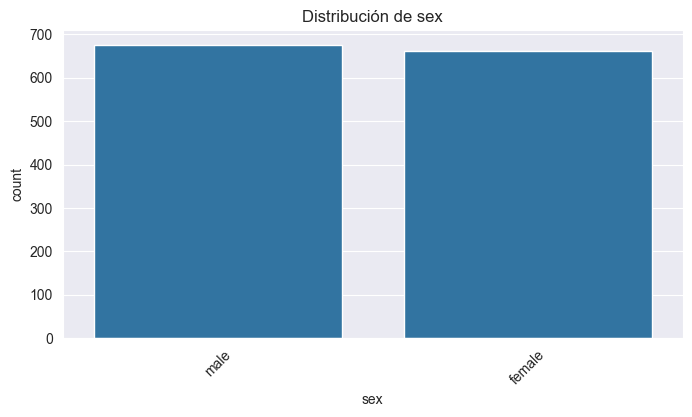

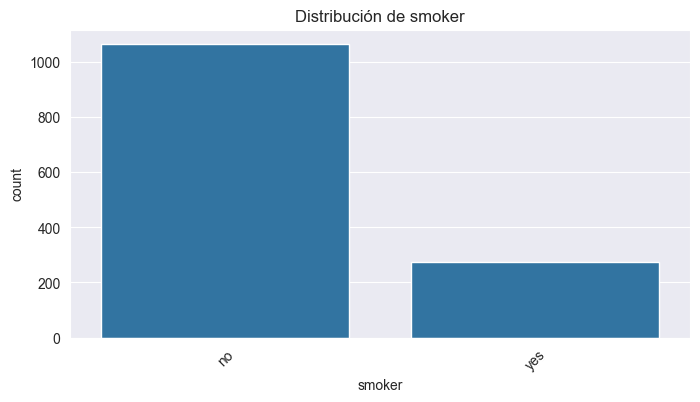

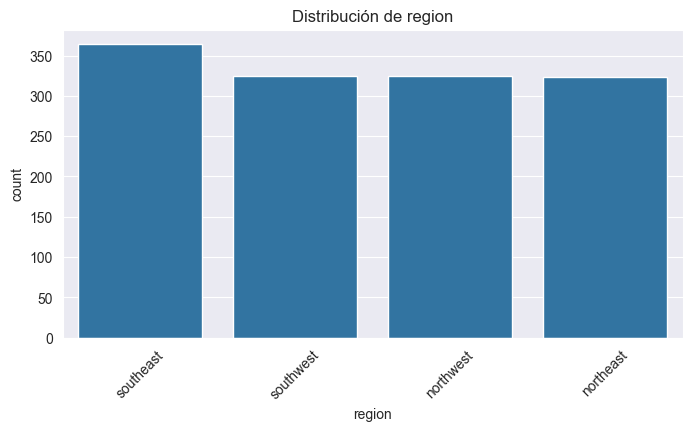

In [6]:
# Analisis de vaiables categ√≥ricas
categorical = df.select_dtypes(include='object').columns
for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuci√≥n de {col}')
    plt.xticks(rotation=45)
    plt.show()

## Observaciones:

- **Sexo (`sex`)**:
  La variable sexo muestra poca diferencia en los costos m√©dicos (`charges`). No es un factor determinante para predecir gastos, aunque puede tener ligeras variaciones.

- **Fumador (`smoker`)**:
  Es la variable categ√≥rica con **mayor impacto** en los costos m√©dicos. Los fumadores presentan costos significativamente m√°s altos que los no fumadores, lo que refleja los riesgos asociados al tabaquismo y su impacto en la salud.

- **Regi√≥n (`region`)**:
  No se observan diferencias relevantes en los costos m√©dicos seg√∫n la regi√≥n geogr√°fica. Esto indica que la ubicaci√≥n no influye de manera notable en los gastos de seguro m√©dico en este dataset.

En resumen, **ser fumador es el factor categ√≥rico m√°s importante** para explicar la variabilidad en los costos m√©dicos, mientras que sexo y regi√≥n tienen un efecto muy bajo o nulo.

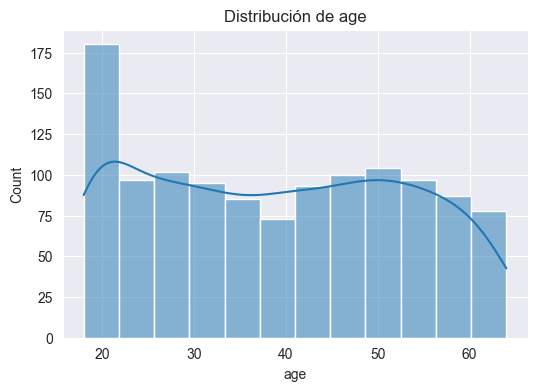

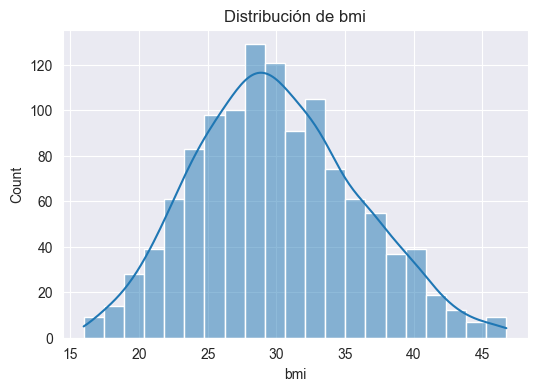

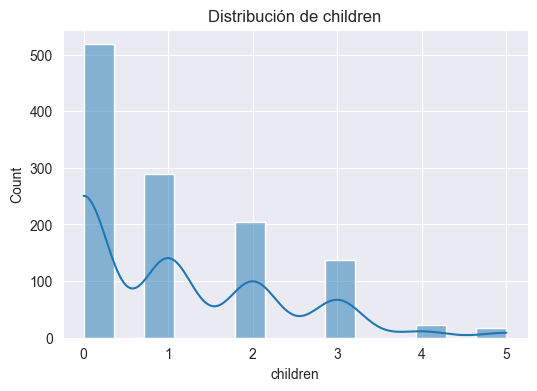

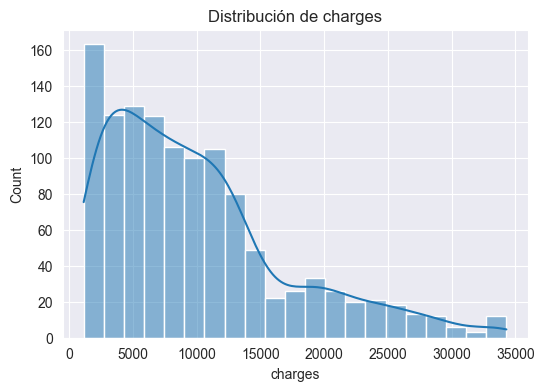

In [36]:
# Analizar las variables num√©ricas
numerical = df.select_dtypes(include=np.number).columns
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

## Observaciones

- **Edad (`age`)** muestra una relaci√≥n directa con el costo m√©dico: a mayor edad, mayores son los gastos. Esto es esperado, ya que las personas mayores tienden a requerir m√°s servicios de salud.

- **√çndice de Masa Corporal (`bmi`)** tiene un impacto importante, especialmente en valores altos (obesidad). El costo se incrementa notablemente si el paciente tambi√©n es **fumador**, indicando un efecto combinado significativo.

- **N√∫mero de hijos (`children`)** no parece tener una relaci√≥n clara o fuerte con los costos m√©dicos. Su impacto es m√≠nimo comparado con otras variables.

- **Costo m√©dico (`charges`)**, la variable objetivo, presenta una distribuci√≥n sesgada con presencia de outliers. Esto sugiere que algunos pacientes generan gastos muy elevados, posiblemente por condiciones cr√≥nicas o tratamientos intensivos.

En conjunto, las variables **edad**, **bmi** y **smoker** parecen ser las **m√°s influyentes** en los costos m√©dicos, lo cual puede ser aprovechado para construir modelos predictivos precisos.

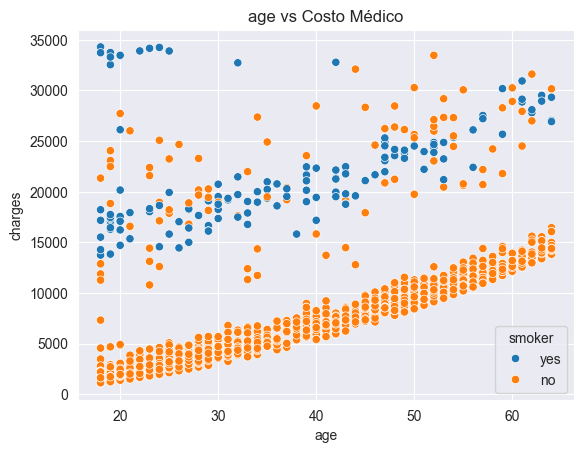

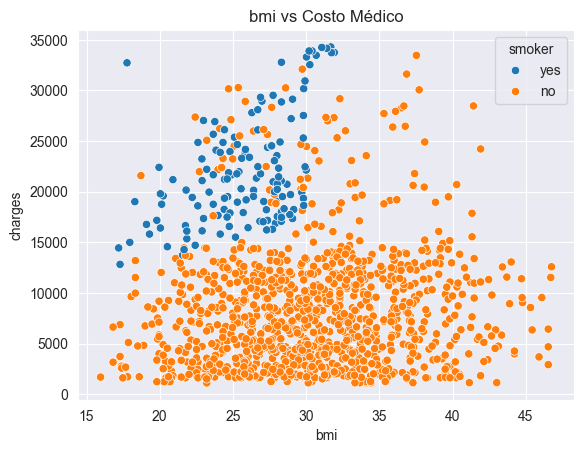

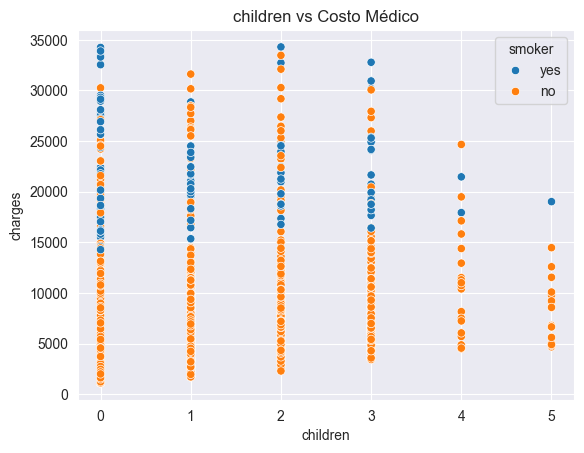

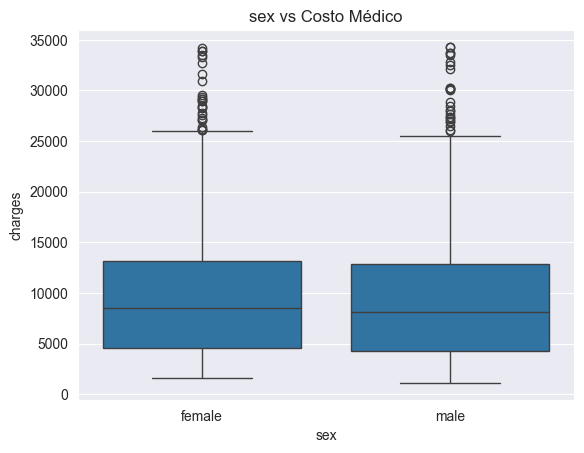

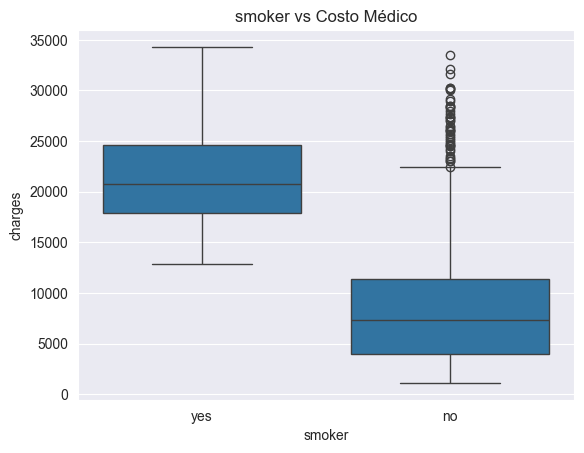

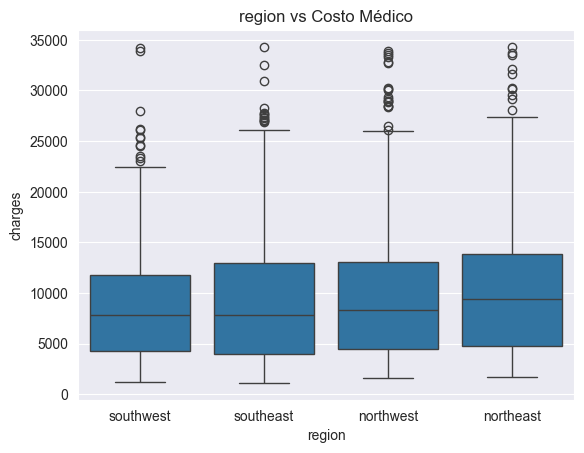

In [17]:
# An√°lisis Bivariado
# Costo vs otras variables num√©ricas
for col in ['age', 'bmi', 'children']:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker')
    plt.title(f'{col} vs Costo M√©dico')
    plt.show()

# Boxplot para variables categ√≥ricas
for col in ['sex', 'smoker', 'region']:
    plt.figure()
    sns.boxplot(data=df, x=col, y='charges')
    plt.title(f'{col} vs Costo M√©dico')
    plt.show()

### Observaciones:
- Las variables **edad** y **bmi** muestran relaci√≥n creciente con `charges`, especialmente cuando el paciente es fumador.
- **Fumar es el factor categ√≥rico m√°s fuerte** que afecta el costo.
- Variables como `children`, `sex` y `region` tienen **bajo impacto** en los costos m√©dicos.

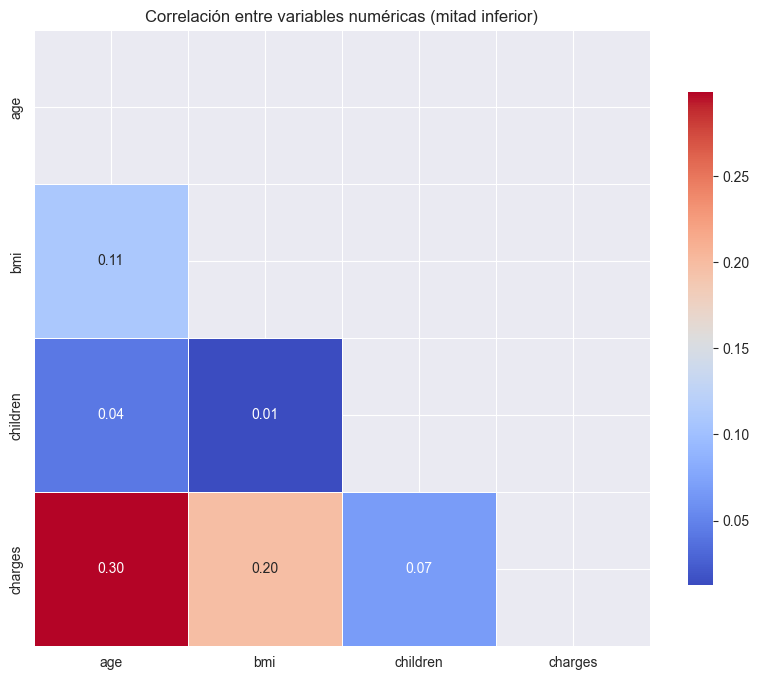

In [8]:
# Calcula la matriz de correlaci√≥n
corr = df[numerical].corr()

# Crea la m√°scara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Dibuja el mapa de calor con la m√°scara
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlaci√≥n entre variables num√©ricas (mitad inferior)')
plt.show()

## Observaciones:
- **`age` y `charges`**:
  Existe una correlaci√≥n positiva moderada (~0.30), indicando que a mayor edad, mayor es el costo m√©dico.

- **`bmi` y `charges`**:
  La correlaci√≥n es positiva y moderada (~0.20), lo que sugiere que un √≠ndice de masa corporal m√°s alto se asocia con mayores gastos m√©dicos.

- **`children` y `charges`**:
  La correlaci√≥n es muy baja o casi nula (~0.07), confirmando que el n√∫mero de hijos tiene poco impacto en los costos.

- **Correlaciones entre variables predictoras**:
  `age`, `bmi` y `children` no presentan correlaciones fuertes entre s√≠, lo que es bueno para el modelo porque evita multicolinealidad significativa.

En resumen, **la variable m√°s fuertemente correlacionada con el costo m√©dico (`charges`) es la edad**, seguida de cerca por el BMI, mientras que el n√∫mero de hijos tiene poca influencia directa.

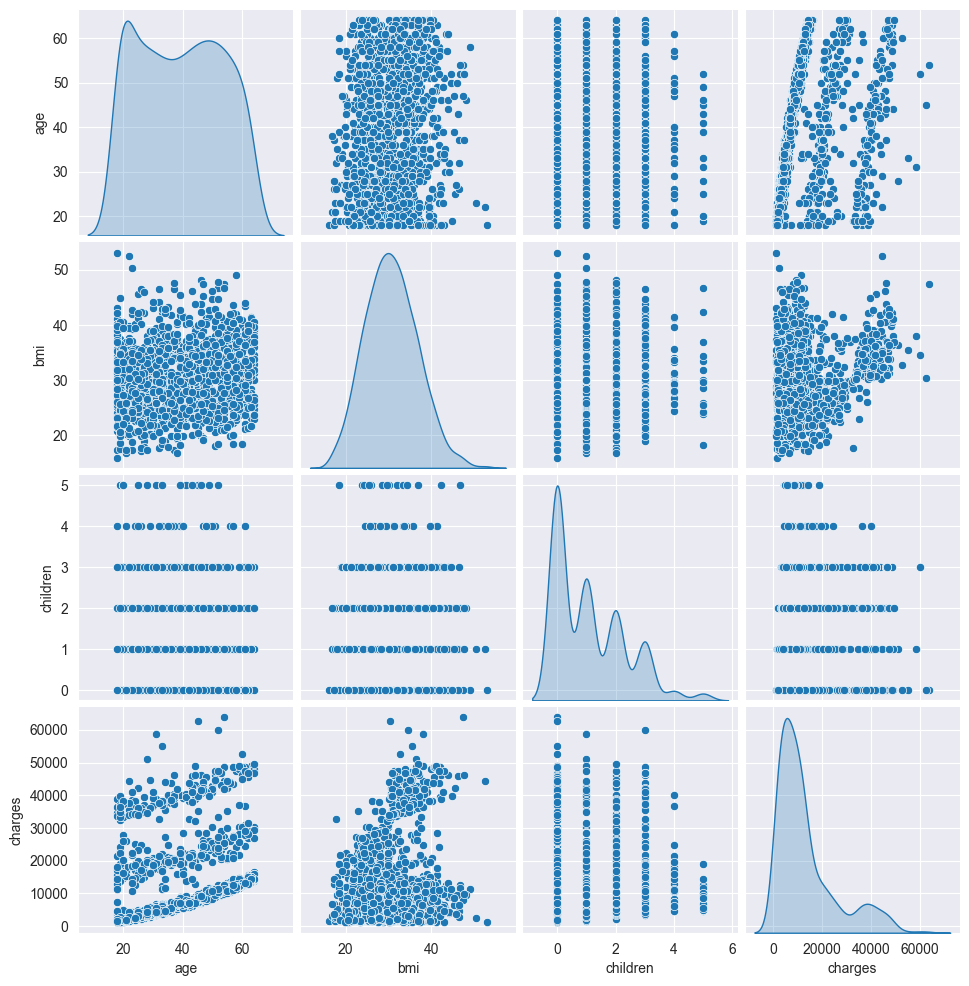

In [12]:
sns.pairplot(df, diag_kind='kde')

## Pasamos a valorar los valores atipicos

In [9]:
df. describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

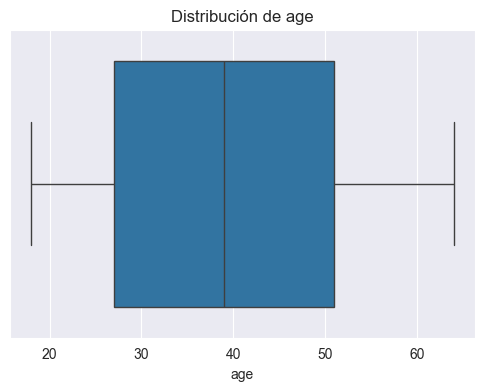

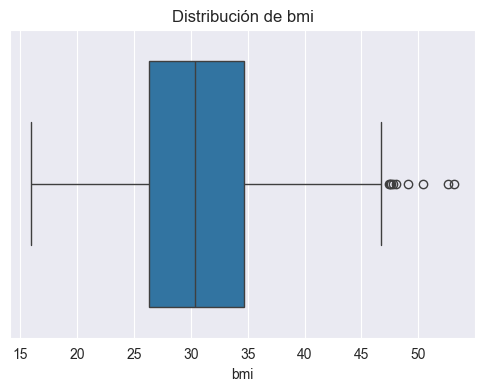

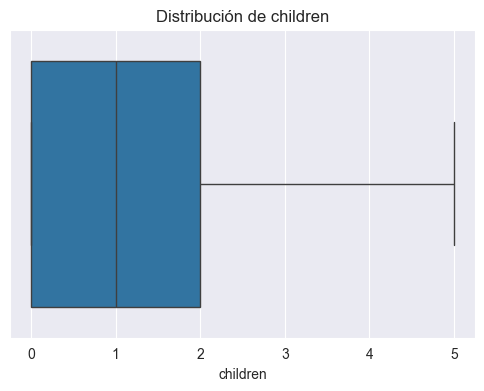

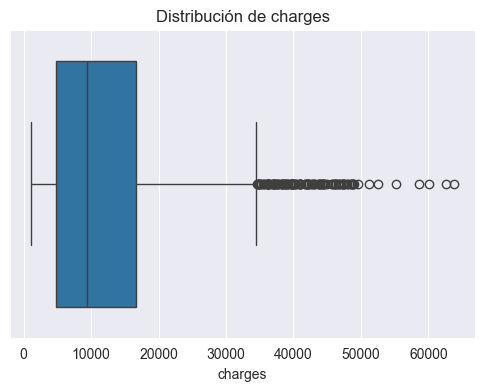

In [11]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

### Observacioes
- `bmi` y `charges` presentan **outliers evidentes por exceso**, lo cual tiene sentido considerando obesidad y altos costos m√©dicos.
- `age` y `children` est√°n mejor distribuidos y tienen **menos valores extremos**.
- Los **outliers en `charges`** son especialmente importantes, ya que afectan la media y los modelos predictivos sensibles a varianza.

In [12]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [15]:
cols_with_outliers = ['bmi', 'charges']

for col in cols_with_outliers:
    df = remove_outliers_iqr(df, col)


- Miramos si nuestro DataFrame tiene algun valor nulo.(NaN/NuL)

In [16]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

### Ordenamos las columnas con las que vamos a trabajar y crear el modelo de trabajo y de entrenamiento.

In [19]:
# Preparar datos
X = df.drop('charges', axis=1)
y = df['charges']

# Columnas categ√≥ricas
cat_features = ['sex', 'smoker', 'region']

- Utilizamos get dummies para convertir las categoricas en numericas

In [33]:
# Aplicamos One-Hot Encoding con drop_first=True para evitar multicolinealidad
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Mostramos las primeras filas
df_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

-Dividimios el modelo el xtrain y xtest

In [34]:
# Divisi√≥n train/test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

- Comenzamos a modelar

In [39]:
# Modelamos el modelo
model = LinearRegression()

- Entrenamos el modelo

In [40]:
#  Entrenar modelo
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'female'

In [37]:
# Evaluaci√≥n
# ========================
y_pred = model.predict(X_test)

print("\n Evaluaci√≥n del modelo:")
print(f"R¬≤: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


## Rsultados del Modelo

- **R¬≤ (R-cuadrado):** `0.79`
  ‚Üí El modelo explica el **79% de la variabilidad** en los costes del seguro.
- **RMSE (Error Cuadr√°tico Medio):** Aproximadamente `4400 USD`
  ‚Üí El modelo puede equivocarse en promedio unos **$4400 por persona**.

---

## Conclusion:

- Las variables que **m√°s influyen** en el coste son:
  - **Fumar**: aumenta enormemente el coste.
  - **Edad**: a mayor edad, mayor coste.
  - **IMC (bmi)**: tener obesidad incrementa el precio.

- Guardamos los archivos que hemos creado.

In [ ]:
# Guardamos los archivos que hemos creado
df_encoded.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/medical_insurance_cost_cleaned.csv", index=False)
X_train.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/X_train.csv", index=False)
X_test.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/X_test.csv", index=False)
y_train.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/y_train.csv", index=False)
y_test.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/y_test.csv", index=False)
model_coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
model_coef.to_csv(r"/workspaces/aliasys-regresion-lineal/data/processed/model_coefficients.csv")